# Sales Data Analysis and Predition Project



In [266]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

import warnings
warnings.filterwarnings('ignore')
sns.set(style="whitegrid")


In [267]:
df = pd.read_csv('Sales_Superstore.csv', encoding='ISO-8859-1')
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [268]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [269]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [270]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [271]:
df.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [272]:
print("Shape:", df.shape)

Shape: (9994, 21)


In [273]:
df.isnull().sum()

,0
Row ID,0
Order ID,0
Order Date,0
Ship Date,0
Ship Mode,0
Customer ID,0
Customer Name,0
Segment,0
Country,0
City,0


In [274]:
# Remove duplicates
df = df.drop_duplicates()

In [275]:
# Fill missing values with median
df.fillna(df.median(numeric_only=True), inplace=True)

In [276]:
# Convert 'Date' to datetime
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])

In [277]:
df['Order Month'] = df['Order Date'].dt.month
df['Order Year'] = df['Order Date'].dt.year
df['Order Weekday'] = df['Order Date'].dt.weekday
df['Is Weekend'] = df['Order Weekday'].apply(lambda x: 1 if x >= 5 else 0)

In [278]:
df.isnull().sum()

,0
Row ID,0
Order ID,0
Order Date,0
Ship Date,0
Ship Mode,0
Customer ID,0
Customer Name,0
Segment,0
Country,0
City,0


In [279]:
df.duplicated().sum()

np.int64(0)

In [280]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

In [281]:

# Drop high-cardinality and unhelpful columns

columns_to_drop = [
    'Row ID', 'Order ID', 'Customer ID', 'Customer Name', 'Product ID',
    'Product Name', 'Postal Code', 'City', 'State', 'Order Date', 'Ship Date'
]
df.drop(columns=columns_to_drop, axis=1, inplace=True)



In [282]:
# Using IQR method
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return df[(df[column] >= lower) & (df[column] <= upper)]

for col in ['Sales', 'Profit', 'Discount']:
    df = remove_outliers(df, col)

print("Shape after outlier removal:", df.shape)

Shape after outlier removal: (6779, 14)


In [283]:
df.describe()

,Sales,Quantity,Discount,Profit,Order Month,Order Year,Order Weekday,Is Weekend
count,6779.000000,6779.000000,6779.000000,6779.000000,6779.000000,6779.000000,6779.000000,6779.000000
mean,67.004453,3.453607,0.097199,11.327627,7.799970,2015.729311,3.185868,0.331317
std,84.303233,2.033511,0.105584,13.045945,3.290471,1.123942,2.120861,0.470722
min,0.990000,1.000000,0.000000,-27.715800,1.000000,2014.000000,0.000000,0.000000
25%,14.940000,2.000000,0.000000,3.235200,5.000000,2015.000000,1.000000,0.000000
50%,34.790000,3.000000,0.000000,7.921200,9.000000,2016.000000,4.000000,0.000000
75%,82.600000,5.000000,0.200000,17.377200,11.000000,2017.000000,5.000000,1.000000
max,496.860000,14.000000,0.500000,50.584800,12.000000,2017.000000,6.000000,1.000000


In [284]:
# Correlation matrix
correlation = df.corr(numeric_only=True)
correlation

,Sales,Quantity,Discount,Profit,Order Month,Order Year,Order Weekday,Is Weekend
Sales,1.000000,0.112505,0.149816,0.367258,0.005862,-0.006512,0.010016,0.008260
Quantity,0.112505,1.000000,-0.012153,0.240938,0.013408,0.001315,0.005694,0.014981
Discount,0.149816,-0.012153,1.000000,-0.281663,0.009084,0.000472,0.002741,-0.004180
Profit,0.367258,0.240938,-0.281663,1.000000,0.013472,0.003600,0.020428,0.019868
Order Month,0.005862,0.013408,0.009084,0.013472,1.000000,-0.007143,0.020148,0.001454
Order Year,-0.006512,0.001315,0.000472,0.003600,-0.007143,1.000000,0.041163,0.023415
Order Weekday,0.010016,0.005694,0.002741,0.020428,0.020148,0.041163,1.000000,0.771650
Is Weekend,0.008260,0.014981,-0.004180,0.019868,0.001454,0.023415,0.771650,1.000000


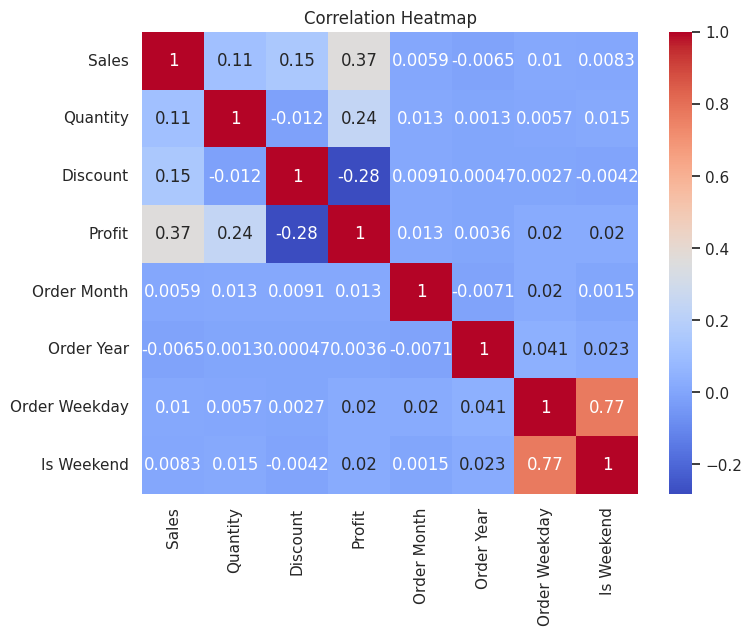

In [285]:
plt.figure(figsize=(8,6))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

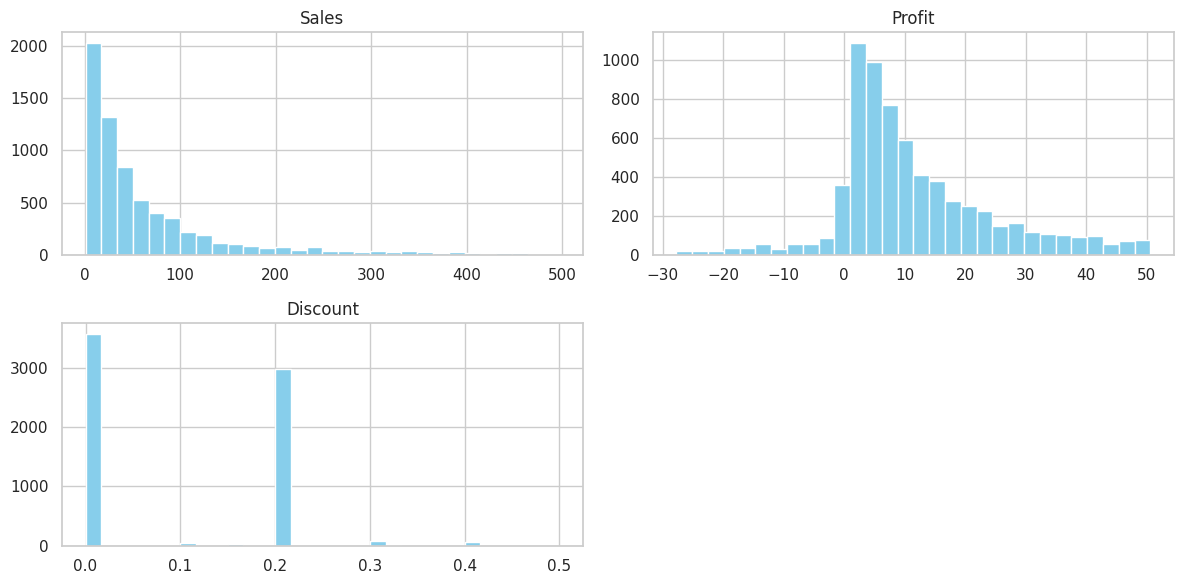

In [286]:
df[['Sales', 'Profit', 'Discount']].hist(bins=30, figsize=(12,6), color='skyblue')
plt.tight_layout()
plt.show()


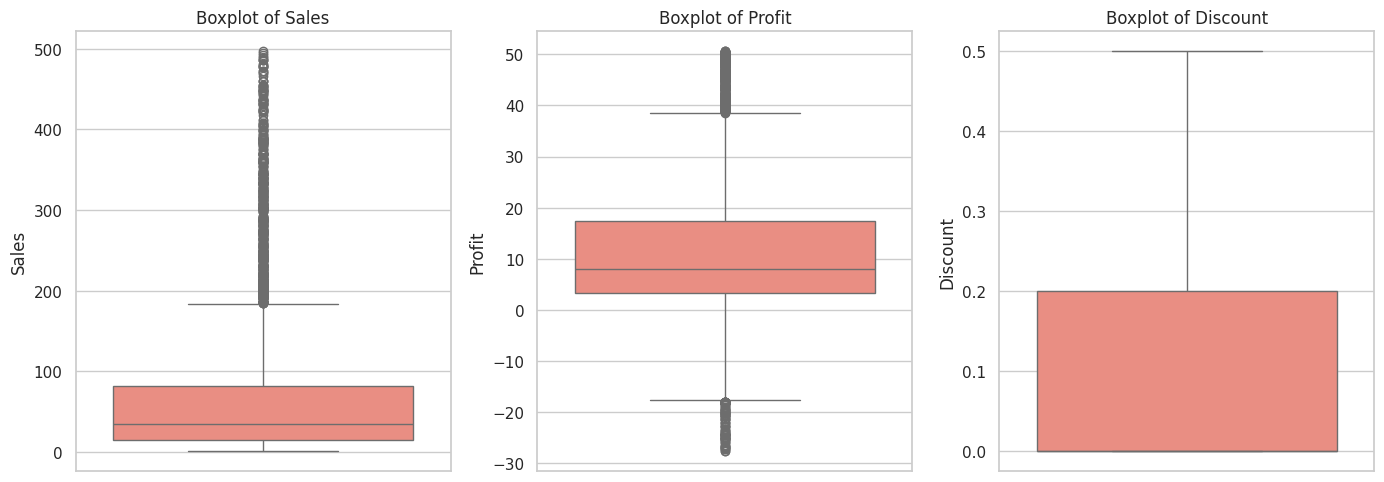

In [287]:
plt.figure(figsize=(14,5))
for i, col in enumerate(['Sales', 'Profit', 'Discount']):
    plt.subplot(1, 3, i+1)
    sns.boxplot(data=df, y=col, color='salmon')
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()


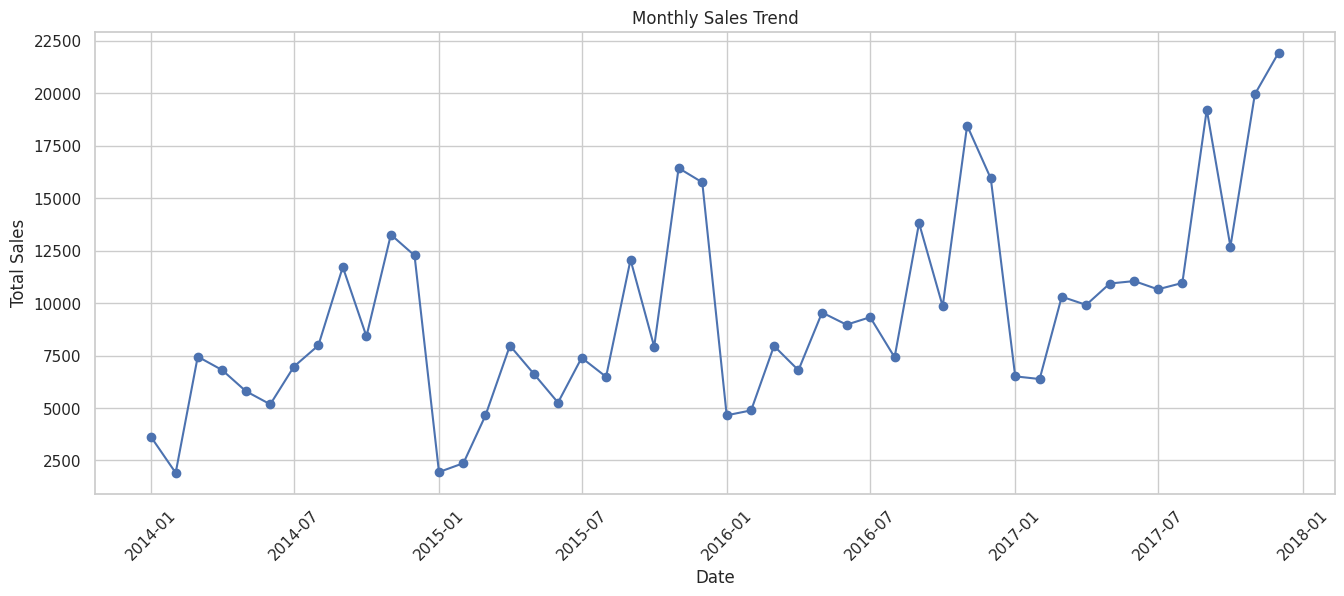

In [288]:
monthly_sales = df.groupby(['Order Year', 'Order Month'])['Sales'].sum().reset_index()

# Combine year and month into a datetime object for plotting
monthly_sales['Date'] = pd.to_datetime(monthly_sales['Order Year'].astype(str) + '-' + monthly_sales['Order Month'].astype(str))

# Sort by date
monthly_sales = monthly_sales.sort_values('Date')

# Plot
plt.figure(figsize=(16,6))
plt.plot(monthly_sales['Date'], monthly_sales['Sales'], marker='o')
plt.title("Monthly Sales Trend")
plt.xlabel("Date")
plt.ylabel("Total Sales")
plt.grid(True)
plt.xticks(rotation=45)
plt.show()


In [289]:
df.columns

Index(['Ship Mode', 'Segment', 'Country', 'Region', 'Category', 'Sub-Category',
       'Sales', 'Quantity', 'Discount', 'Profit', 'Order Month', 'Order Year',
       'Order Weekday', 'Is Weekend'],
      dtype='object')

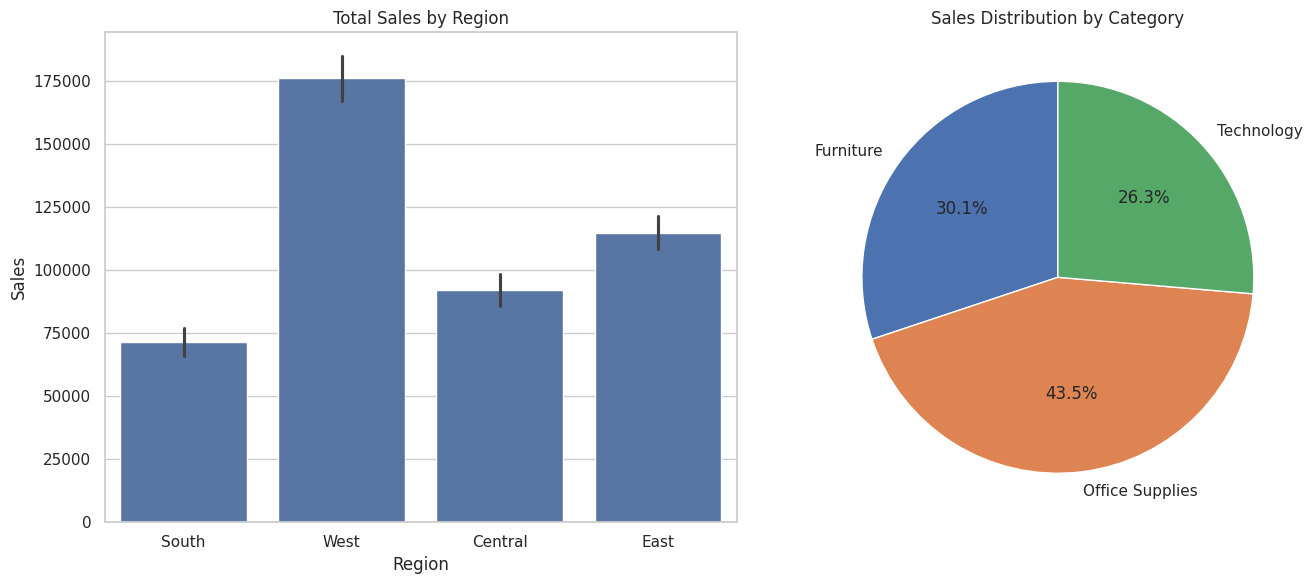

In [290]:
# Bar chart by Region
plt.figure(figsize=(14,6))

plt.subplot(1,2,1)
sns.barplot(data=df, x='Region', y='Sales', estimator=sum)
plt.title("Total Sales by Region")

plt.subplot(1,2,2)
df.groupby('Category')['Sales'].sum().plot.pie(autopct='%1.1f%%', startangle=90)
plt.ylabel('')
plt.title("Sales Distribution by Category")

plt.tight_layout()
plt.show()


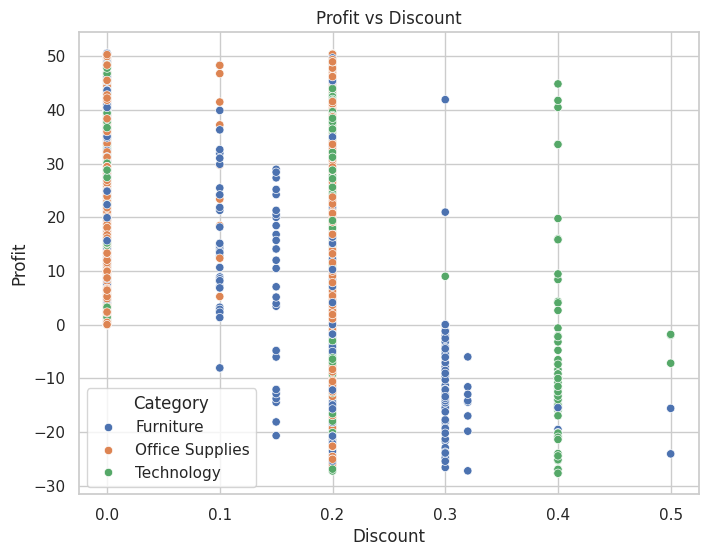

In [291]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='Discount', y='Profit', hue='Category')
plt.title("Profit vs Discount")
plt.show()

In [292]:
# One-hot encode remaining categorical columns
df = pd.get_dummies(df, drop_first=True)


In [298]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV



X = df.drop('Sales', axis=1)
y = df['Sales']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

params = {
    'n_estimators': [100, 200, 300, 400],
    'max_depth': [10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf = RandomForestRegressor(random_state=42)

search = RandomizedSearchCV(rf, param_distributions=params, n_iter=20, cv=3, n_jobs=-1, verbose=1)
search.fit(X_train, y_train)
print("Best Params:", search.best_params_)

# Evaluate
y_pred = search.predict(X_test)
print("Tuned R²:", r2_score(y_test, y_pred))


Fitting 3 folds for each of 20 candidates, totalling 60 fits
Best Params: {'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_depth': 15}
Tuned R²: 0.6709115698989873
